In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json

## Load The Data

In [76]:
file_list = [os.path.join('data', f) for f in os.listdir('data')]
n_samples = len(file_list)
print(f'Dataset has {len(file_list)} elements')

dfs = []
for file in file_list:
    with open(file) as f:
        json_data = pd.json_normalize(json.loads(f.read()))
    dfs.append(json_data)
df = pd.concat(dfs, sort=False) # or sort=True depending on your needs
df.head()

Dataset has 1088 elements


,angles,landmarks.MouthInner_up.x,landmarks.MouthInner_up.y,landmarks.LeftBrowMiddle_down.x,landmarks.LeftBrowMiddle_down.y,landmarks.Ridge2.x,landmarks.Ridge2.y,landmarks.LeftEyeUpperOuter.x,landmarks.LeftEyeUpperOuter.y,landmarks.MouthLeft_down_1.x,...,landmarks.CheekLeft2.x,landmarks.CheekLeft2.y,landmarks.MouthCenter_lower.x,landmarks.MouthCenter_lower.y,landmarks.BaseRight.x,landmarks.BaseRight.y,landmarks.MouthRight_up_1.x,landmarks.MouthRight_up_1.y,landmarks.CheekLeft3.x,landmarks.CheekLeft3.y
0,"[167.92327991553472, 6.844284144263729, -0.500...",346.743652,787.846680,436.602570,538.942139,349.907227,639.785217,438.010162,597.887207,391.197266,...,496.979919,711.086304,345.321045,819.711548,304.389099,714.753174,291.771088,779.790100,489.594513,759.297119
0,"[175.48849053723183, 15.492908174928107, -8.38...",452.450409,746.855591,558.165039,563.177063,493.028473,629.690308,541.191345,600.450562,491.307800,...,263.152405,676.377197,444.444336,778.919617,428.338867,669.450256,396.399658,723.573547,265.359192,727.125854
0,"[149.3257974968695, 18.787193723096767, -9.520...",407.124542,657.317505,492.801178,547.425232,440.820129,560.803223,488.044983,592.349854,441.597168,...,511.699493,689.459961,403.822205,670.275574,377.881592,603.254456,348.122681,644.012695,505.405151,722.846924
0,"[177.08374703025774, -2.880896196654979, -2.82...",373.800293,748.419800,471.997833,544.100586,377.178619,624.058350,469.660797,572.945557,423.095490,...,539.113342,684.525757,373.329529,770.225586,334.846497,680.794067,322.609222,742.253479,532.701782,732.530701
0,"[175.68114234635644, 1.0470034219606936, -2.44...",369.911102,763.856445,463.643616,558.193237,374.941223,640.313110,459.960815,593.765015,418.329254,...,207.873672,685.383484,369.376038,785.787720,329.612335,695.242554,316.196228,755.431641,211.585983,734.283203


In [77]:
# Check for Nan values

def nan_count(df:pd.DataFrame) -> None:
    for col in df.columns:
        hasNan = df[col].isnull().values.any()
        if hasNan:
            nan_count = df[col].isna().sum()
            nan_perc = nan_count/len(df[col])
            print(f'{col} has: {nan_perc*100} % of NaN values')
        
nan_count(df)

In [78]:
# extract target 
y = df['angles']
y = y.apply(lambda x: x[1])
# normalize
y = y/180.

y.head()


0    0.038024
0    0.086072
0    0.104373
0   -0.016005
0    0.005817
Name: angles, dtype: float64

In [79]:

# filter out useless features
features_to_keep = ['CheekLeft', 'CheekLeft1', 'CheekLeft2', 'CheekLeft3', 'CheekLeft4', 'CheekLeft5', 'CheekLeft6', 'CheekLeft7', 'ChinCenter', 'CheekRight7', 'CheekRight6', 'CheekRight5', 'CheekRight4', 'CheekRight3', 'CheekRight2', 'CheekRight1', 'CheekRight']

extended = []
for feat in features_to_keep:
    extended.append(f'landmarks.{feat}.x')
    extended.append(f'landmarks.{feat}.y')

print(extended)

df = df[extended]
df.head()

['landmarks.CheekLeft.x', 'landmarks.CheekLeft.y', 'landmarks.CheekLeft1.x', 'landmarks.CheekLeft1.y', 'landmarks.CheekLeft2.x', 'landmarks.CheekLeft2.y', 'landmarks.CheekLeft3.x', 'landmarks.CheekLeft3.y', 'landmarks.CheekLeft4.x', 'landmarks.CheekLeft4.y', 'landmarks.CheekLeft5.x', 'landmarks.CheekLeft5.y', 'landmarks.CheekLeft6.x', 'landmarks.CheekLeft6.y', 'landmarks.CheekLeft7.x', 'landmarks.CheekLeft7.y', 'landmarks.ChinCenter.x', 'landmarks.ChinCenter.y', 'landmarks.CheekRight7.x', 'landmarks.CheekRight7.y', 'landmarks.CheekRight6.x', 'landmarks.CheekRight6.y', 'landmarks.CheekRight5.x', 'landmarks.CheekRight5.y', 'landmarks.CheekRight4.x', 'landmarks.CheekRight4.y', 'landmarks.CheekRight3.x', 'landmarks.CheekRight3.y', 'landmarks.CheekRight2.x', 'landmarks.CheekRight2.y', 'landmarks.CheekRight1.x', 'landmarks.CheekRight1.y', 'landmarks.CheekRight.x', 'landmarks.CheekRight.y']


,landmarks.CheekLeft.x,landmarks.CheekLeft.y,landmarks.CheekLeft1.x,landmarks.CheekLeft1.y,landmarks.CheekLeft2.x,landmarks.CheekLeft2.y,landmarks.CheekLeft3.x,landmarks.CheekLeft3.y,landmarks.CheekLeft4.x,landmarks.CheekLeft4.y,...,landmarks.CheekRight4.x,landmarks.CheekRight4.y,landmarks.CheekRight3.x,landmarks.CheekRight3.y,landmarks.CheekRight2.x,landmarks.CheekRight2.y,landmarks.CheekRight1.x,landmarks.CheekRight1.y,landmarks.CheekRight.x,landmarks.CheekRight.y
0,499.362823,612.455322,502.962830,662.048706,496.979919,711.086304,489.594513,759.297119,479.726562,806.247070,...,183.908081,815.758789,168.989868,766.419006,159.210663,715.006958,153.586365,663.630615,153.836639,612.064941
0,281.790344,575.556396,271.509827,624.840332,263.152405,676.377197,265.359192,727.125854,278.196350,775.735962,...,546.366089,788.239624,557.644287,746.337402,567.165100,703.959656,571.922974,660.030457,570.214844,617.330627
0,509.164368,623.832153,512.912842,657.611572,511.699493,689.459961,505.405151,722.846924,495.970032,752.576782,...,250.475433,713.799438,237.363892,680.687988,234.891815,644.019897,242.821274,603.943420,255.661072,563.873108
0,541.759766,587.518921,543.284424,635.650757,539.113342,684.525757,532.701782,732.530701,518.713379,778.471802,...,235.110504,766.899414,226.286636,719.505127,221.992355,671.844116,223.537537,622.965210,229.084015,574.922119
0,216.971710,586.760620,210.494492,635.402588,207.873672,685.383484,211.585983,734.283203,221.101532,782.658020,...,504.501129,788.494141,516.662781,742.238525,521.923706,695.068970,524.608765,647.309021,521.249756,600.515991


In [80]:
# Normalize X, Y -> img size is 720,1280
w, h = 720., 1280.
columns = df.columns

for col in columns:
    if col.split('.')[-1] == 'x':
        df[col] = df[col] / w
    
    elif col.split('.')[-1] == 'y':
        df[col] = df[col] / h
    
    else:
        print('Wrong feature')

df.head()


,landmarks.CheekLeft.x,landmarks.CheekLeft.y,landmarks.CheekLeft1.x,landmarks.CheekLeft1.y,landmarks.CheekLeft2.x,landmarks.CheekLeft2.y,landmarks.CheekLeft3.x,landmarks.CheekLeft3.y,landmarks.CheekLeft4.x,landmarks.CheekLeft4.y,...,landmarks.CheekRight4.x,landmarks.CheekRight4.y,landmarks.CheekRight3.x,landmarks.CheekRight3.y,landmarks.CheekRight2.x,landmarks.CheekRight2.y,landmarks.CheekRight1.x,landmarks.CheekRight1.y,landmarks.CheekRight.x,landmarks.CheekRight.y
0,0.693559,0.478481,0.698559,0.517226,0.690250,0.555536,0.679992,0.593201,0.666287,0.629881,...,0.255428,0.637312,0.234708,0.598765,0.221126,0.558599,0.213314,0.518461,0.213662,0.478176
0,0.391375,0.449653,0.377097,0.488157,0.365489,0.528420,0.368554,0.568067,0.386384,0.606044,...,0.758842,0.615812,0.774506,0.583076,0.787729,0.549968,0.794337,0.515649,0.791965,0.482290
0,0.707173,0.487369,0.712379,0.513759,0.710694,0.538641,0.701952,0.564724,0.688847,0.587951,...,0.347883,0.557656,0.329672,0.531787,0.326239,0.503141,0.337252,0.471831,0.355085,0.440526
0,0.752444,0.458999,0.754562,0.496602,0.748769,0.534786,0.739864,0.572290,0.720435,0.608181,...,0.326542,0.599140,0.314287,0.562113,0.308323,0.524878,0.310469,0.486692,0.318172,0.449158
0,0.301350,0.458407,0.292353,0.496408,0.288713,0.535456,0.293869,0.573659,0.307085,0.611452,...,0.700696,0.616011,0.717587,0.579874,0.724894,0.543023,0.728623,0.505710,0.723958,0.469153


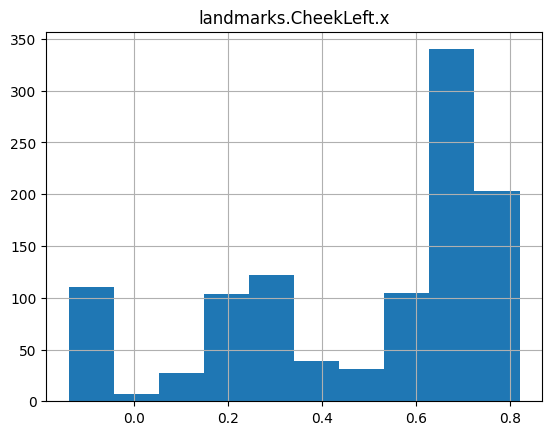

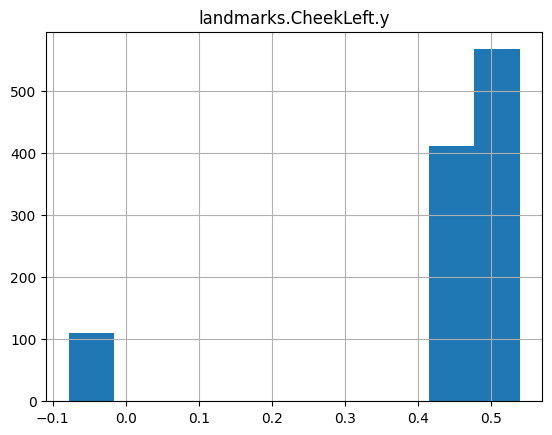

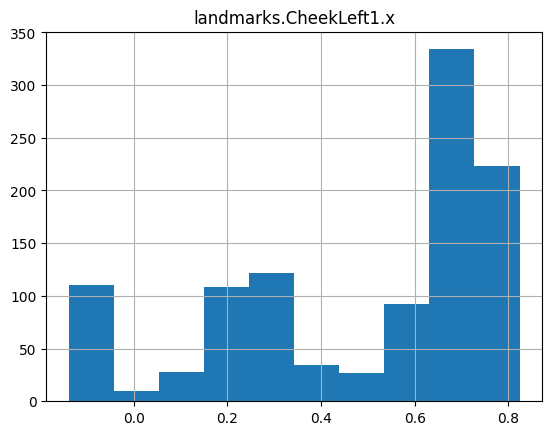

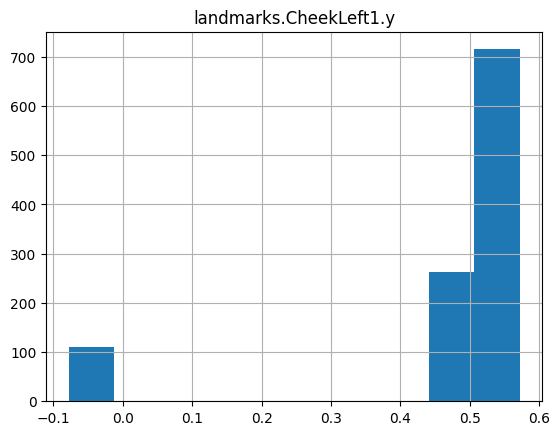

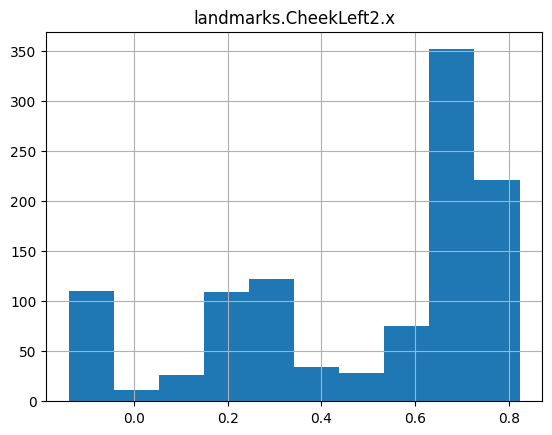

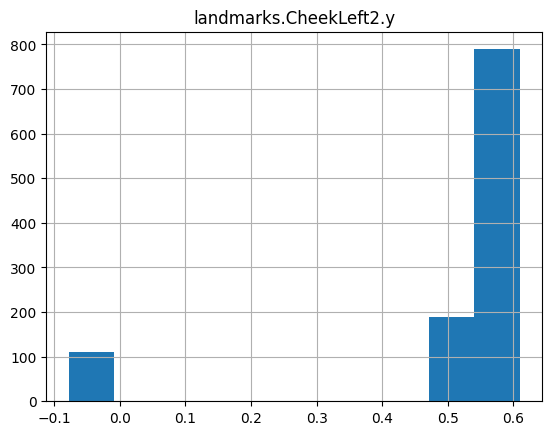

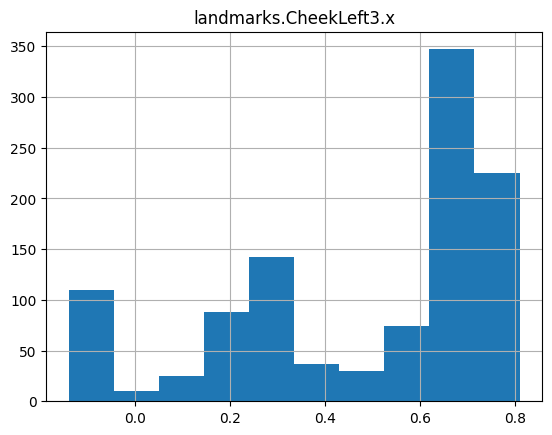

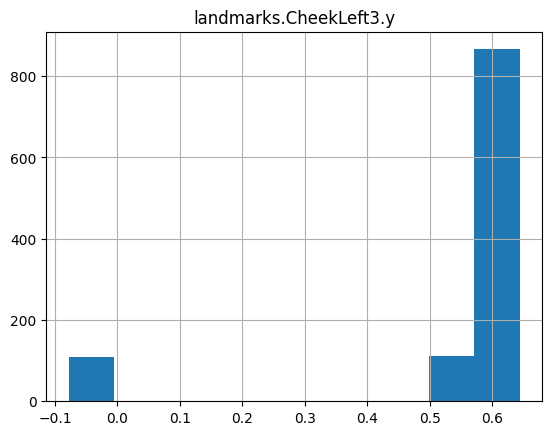

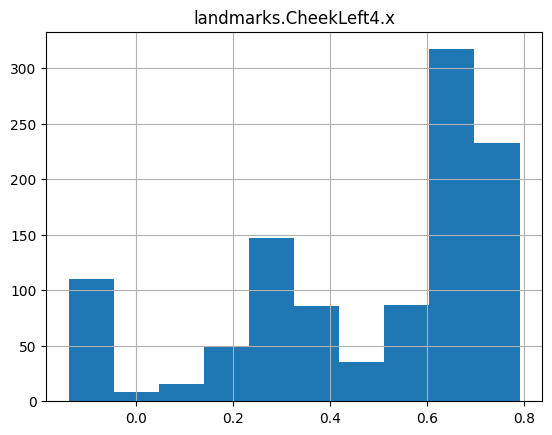

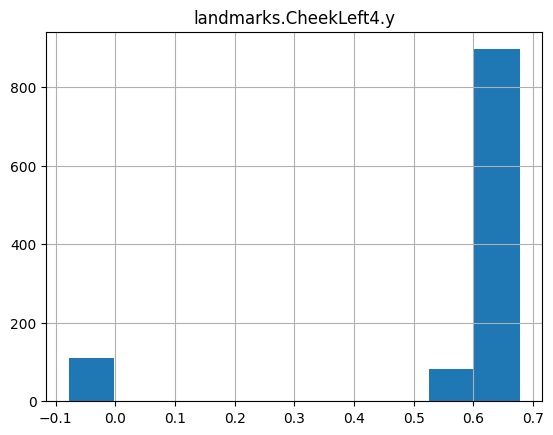

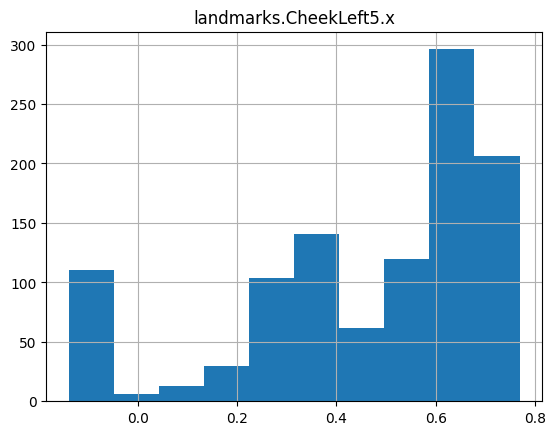

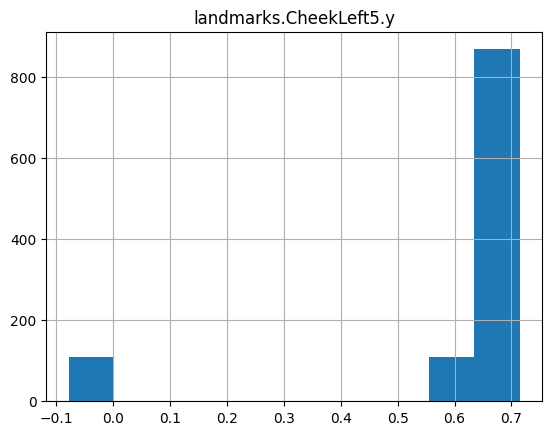

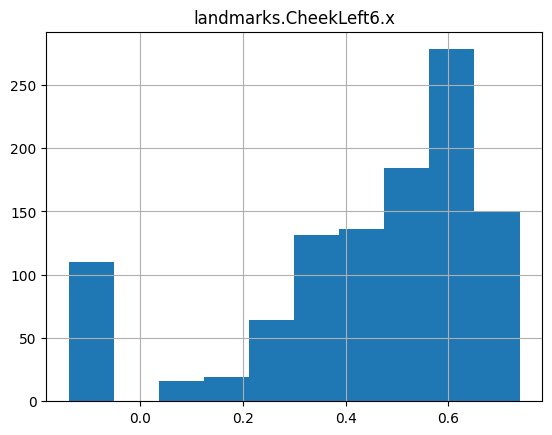

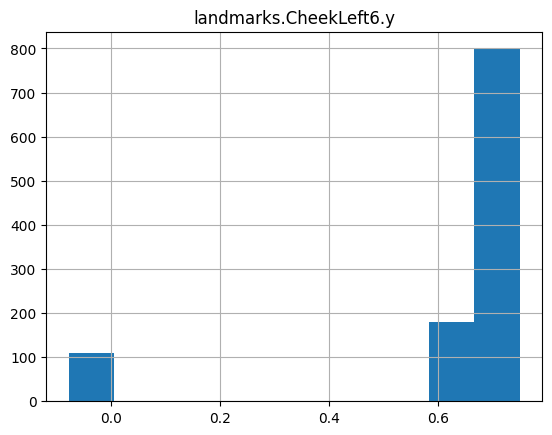

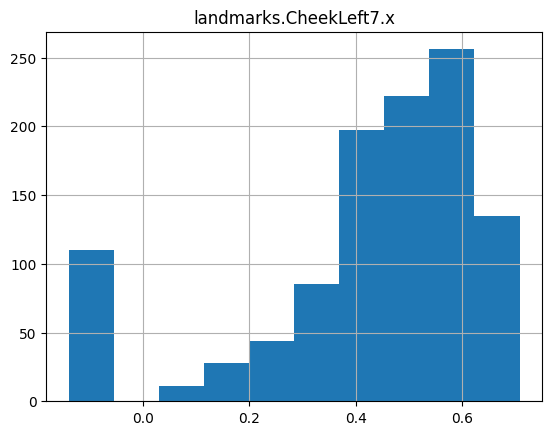

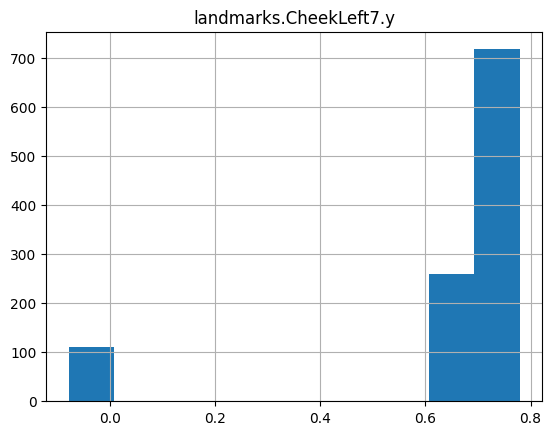

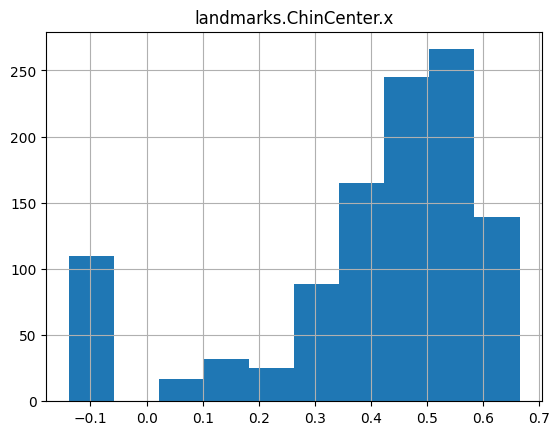

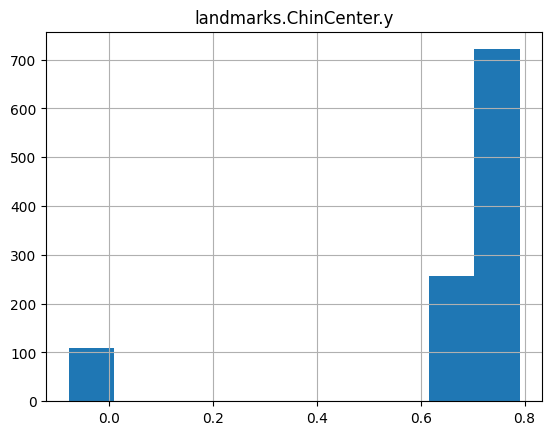

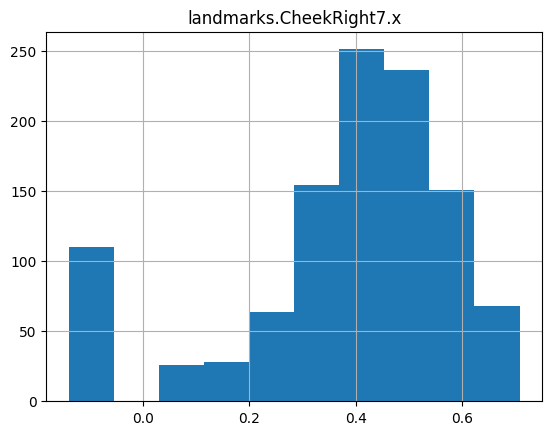

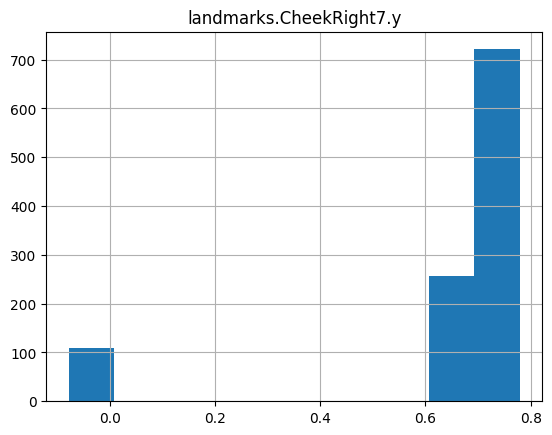

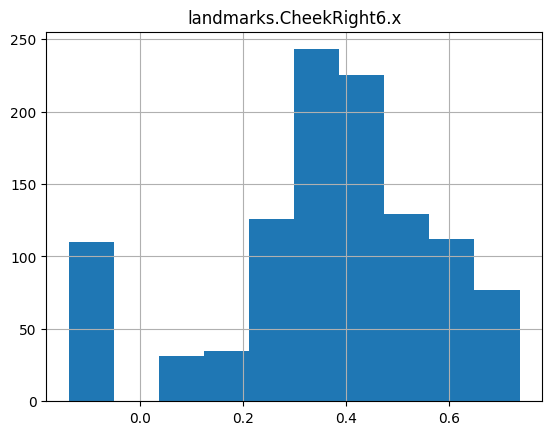

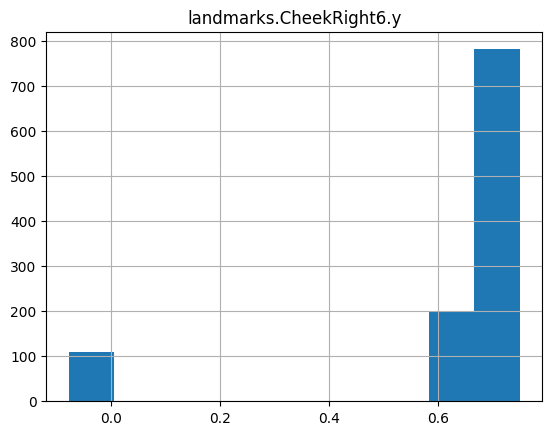

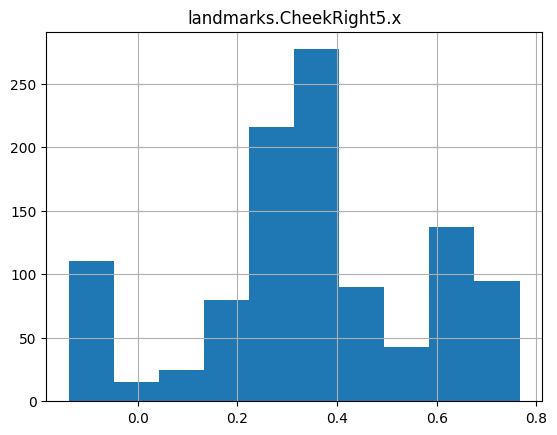

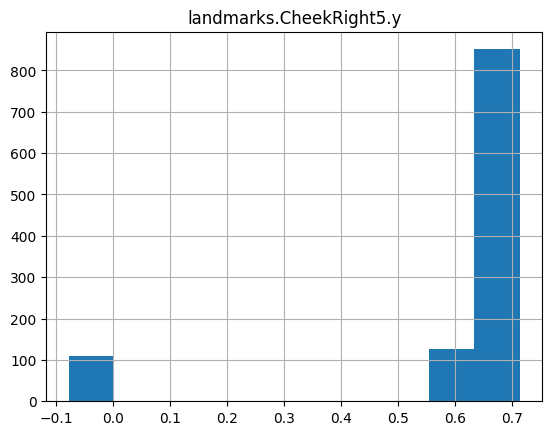

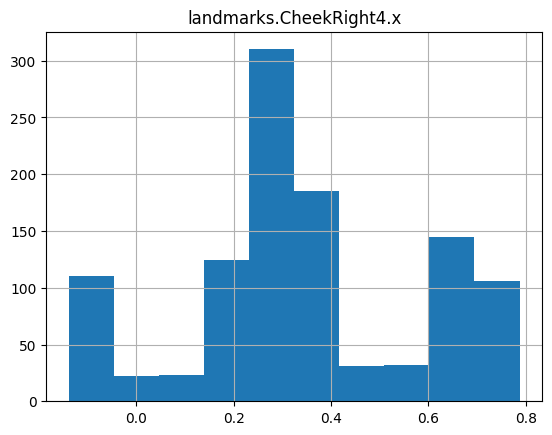

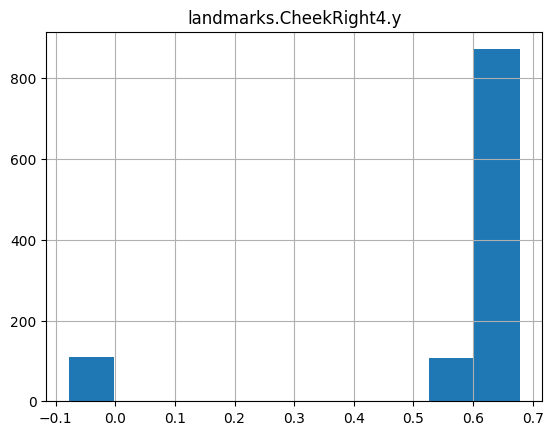

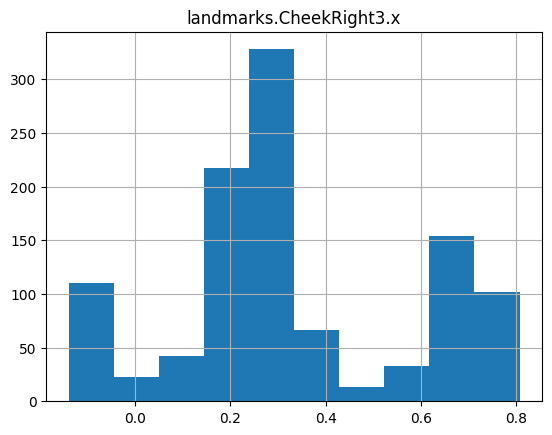

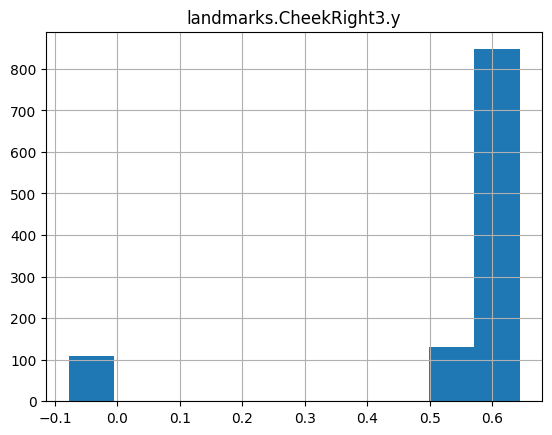

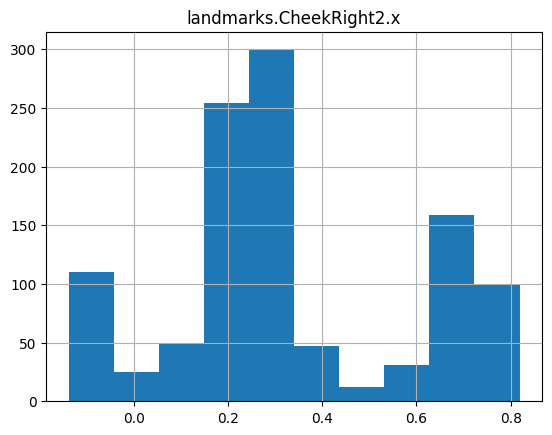

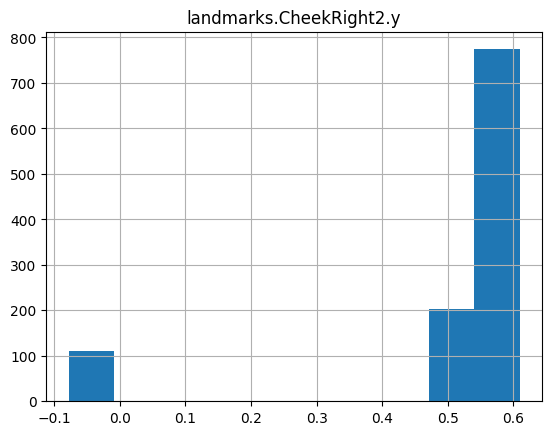

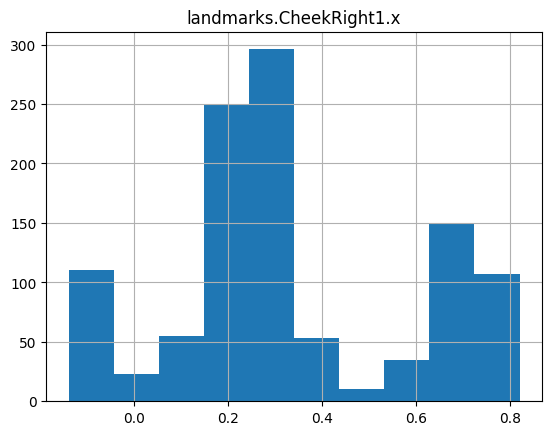

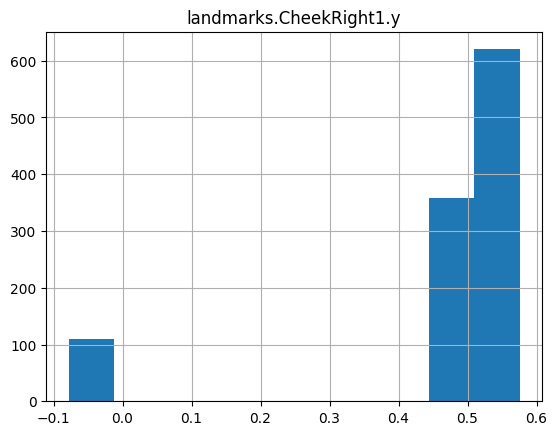

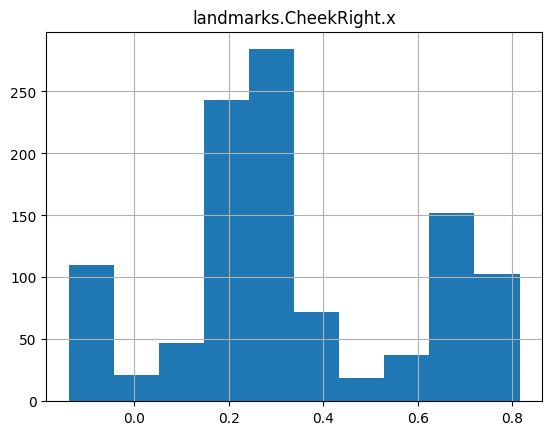

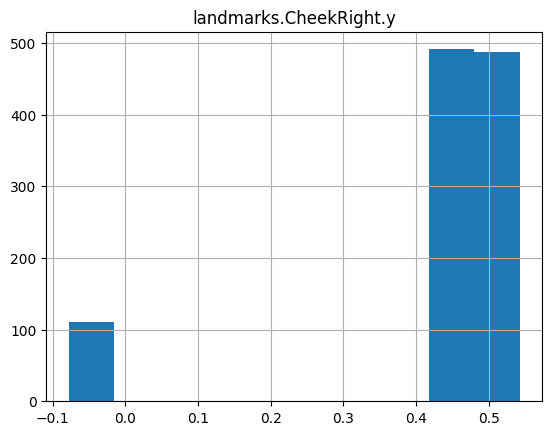

In [81]:
for col in df.columns:
        plt.title(col)
        df[col].hist(bins=10)
        plt.show()


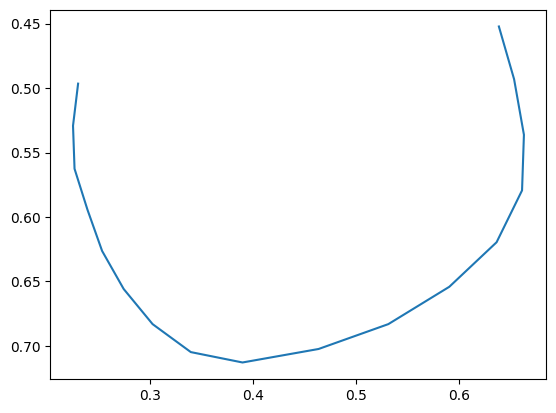

In [89]:
plt.gca().invert_yaxis()

def visualize_sample(row):
    x = []
    y = []
    
    for col in columns:
        if col.split('.')[-1] == 'x':
            x.append(row[col])
        
        elif col.split('.')[-1] == 'y':
            y.append(row[col])
        
        else:
            print('Wrong feature')
    
    plt.plot(x, y)    
    plt.show()

selection = int(input(f'Select a row in the range of {n_samples}: '))
visualize_sample(df.iloc[selection, :])


## Clean Data

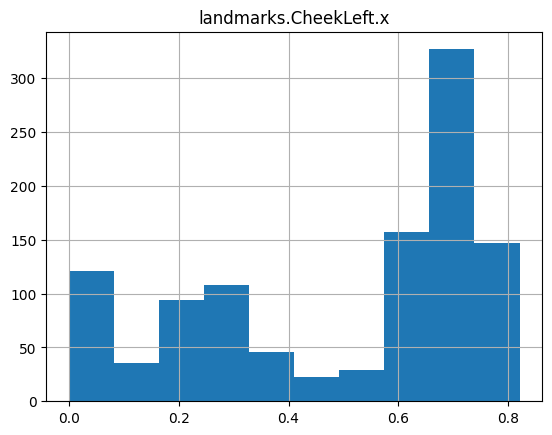

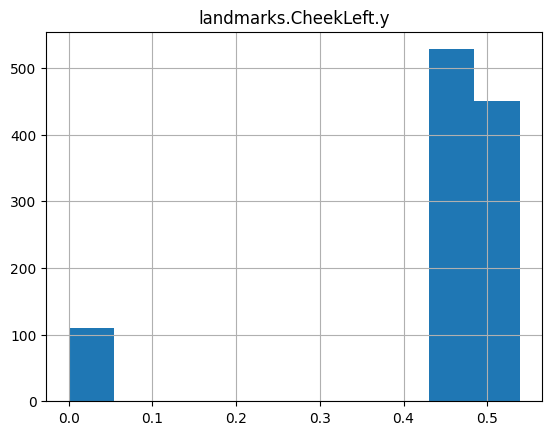

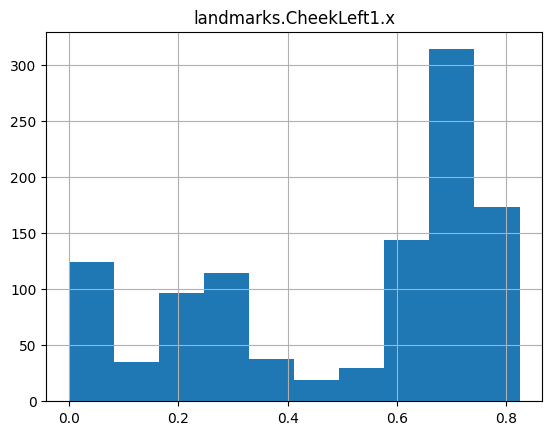

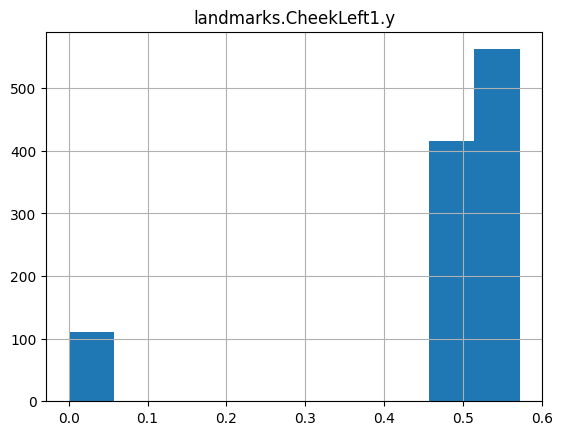

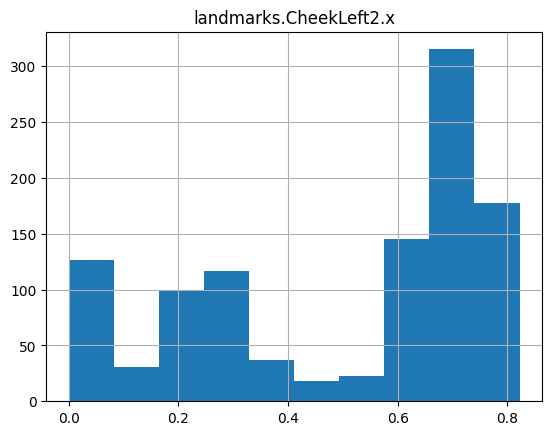

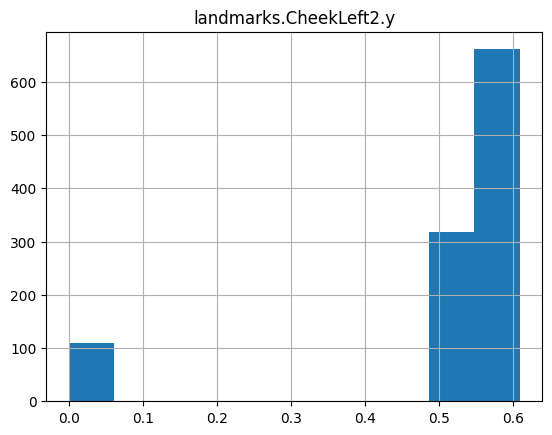

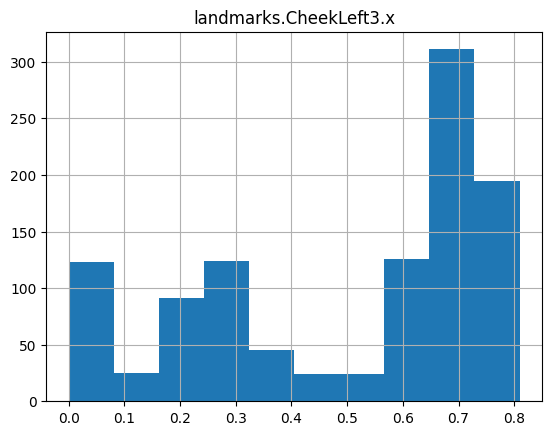

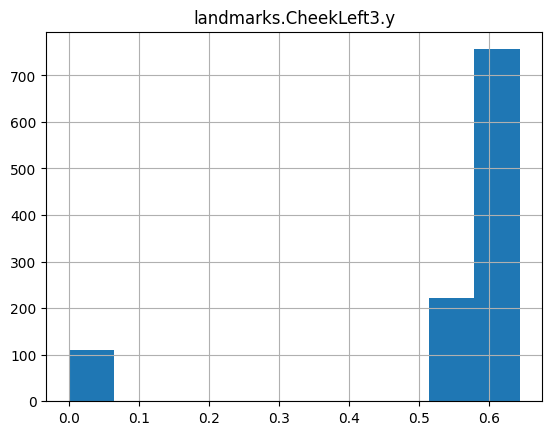

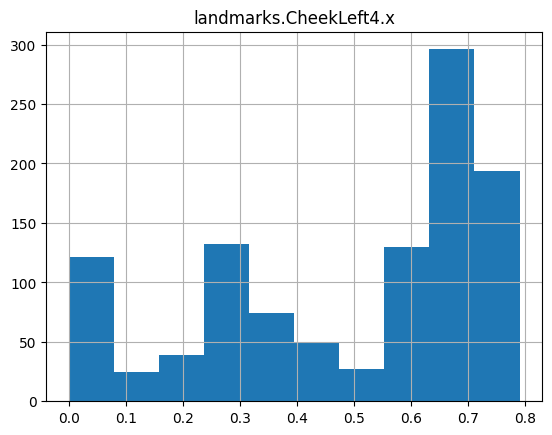

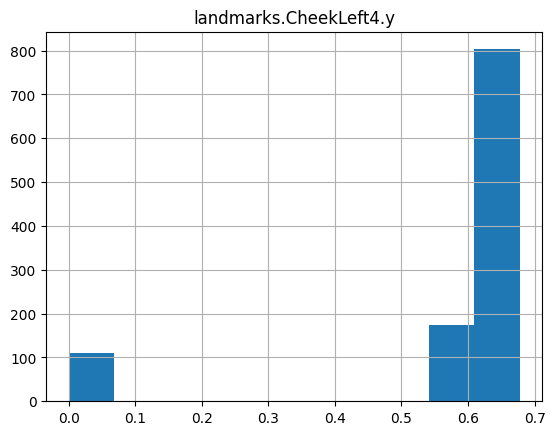

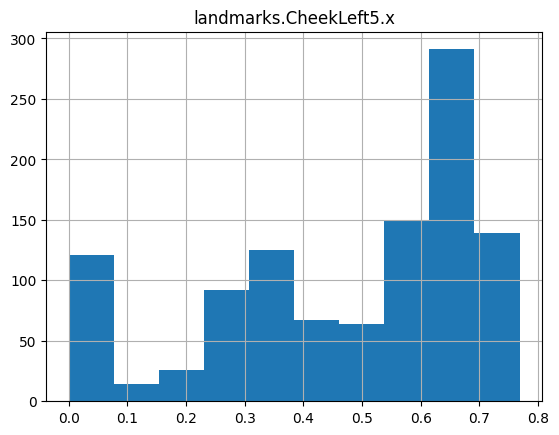

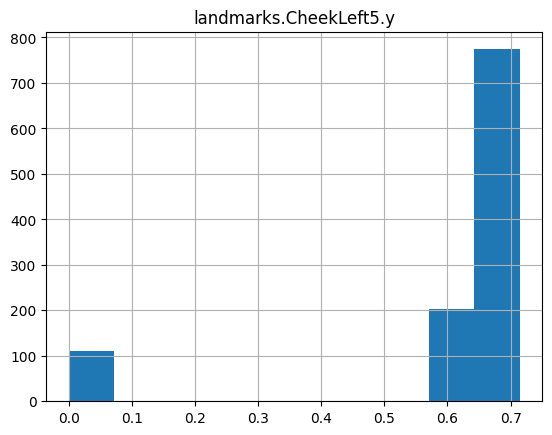

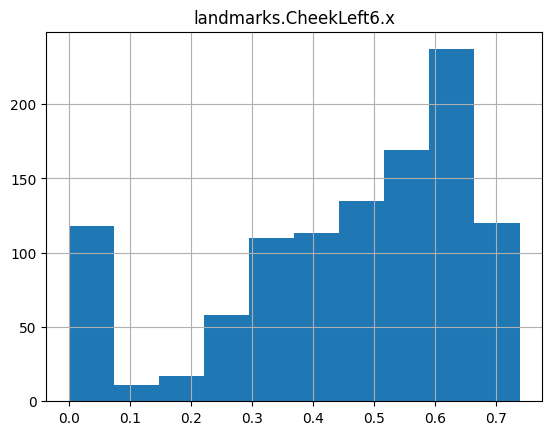

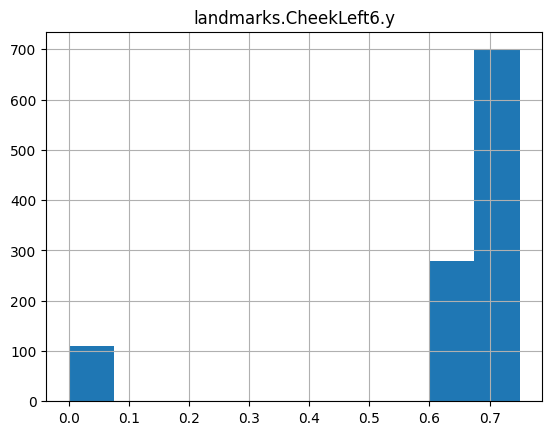

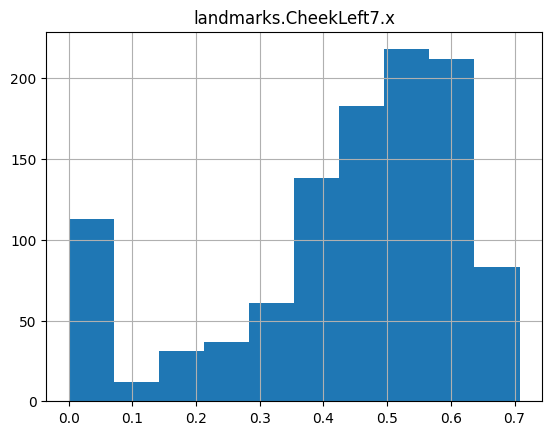

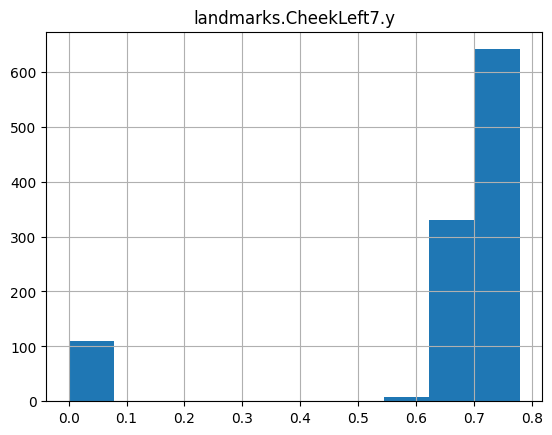

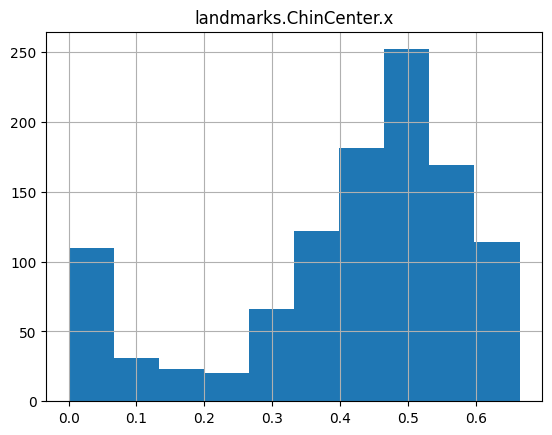

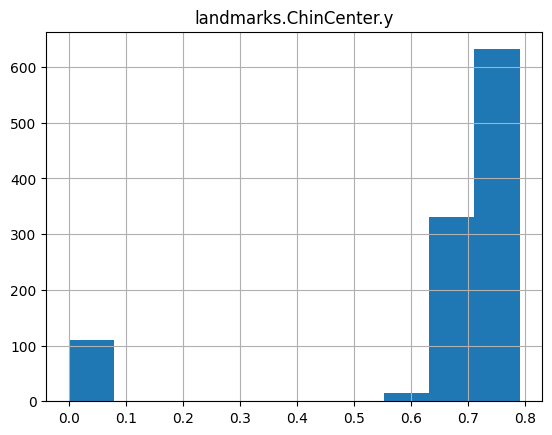

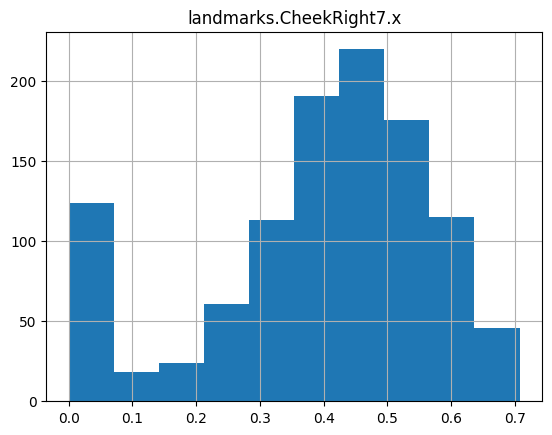

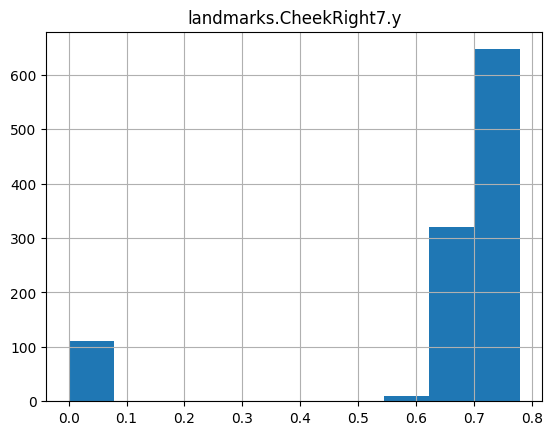

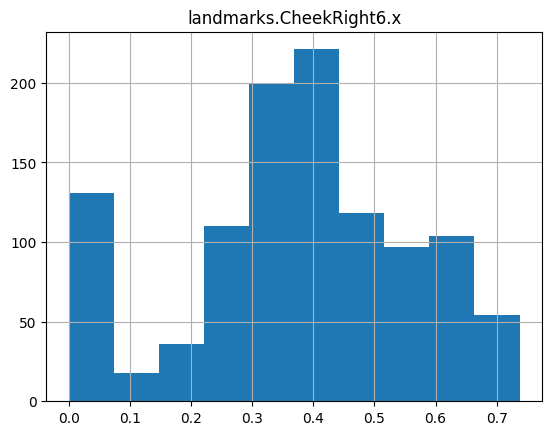

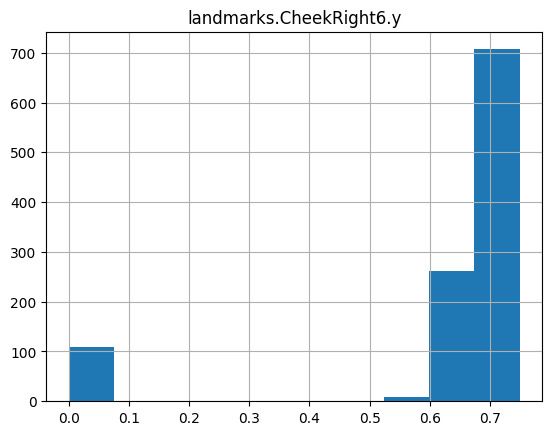

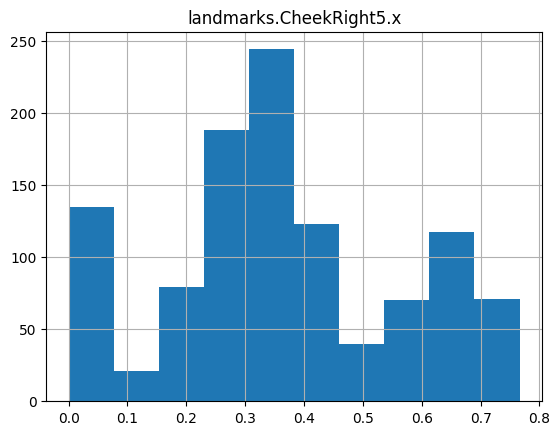

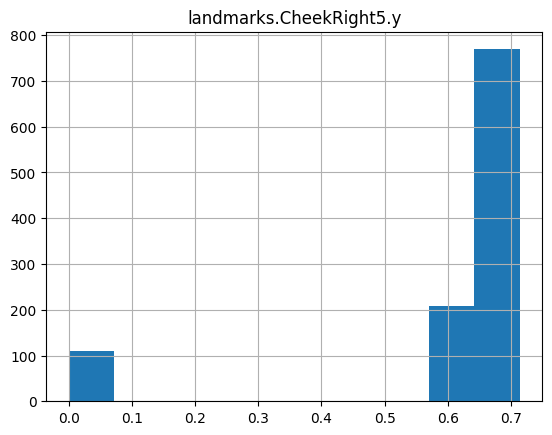

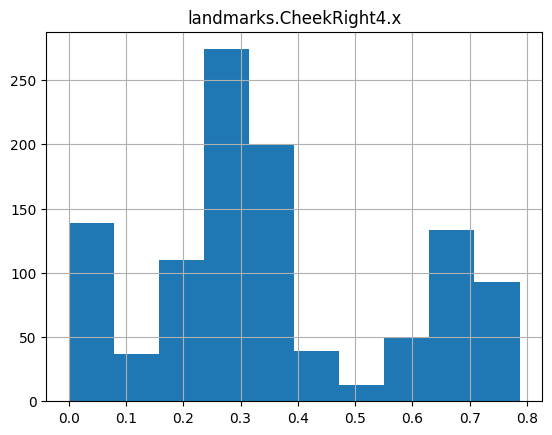

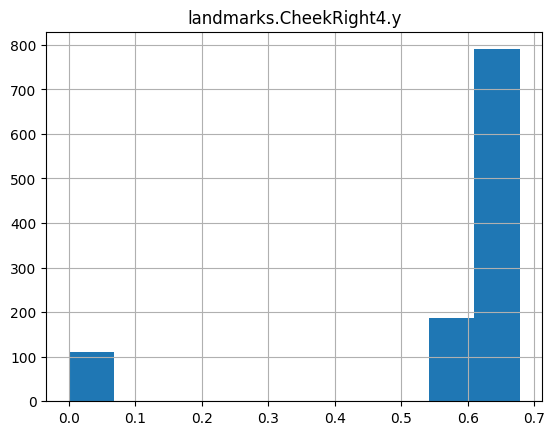

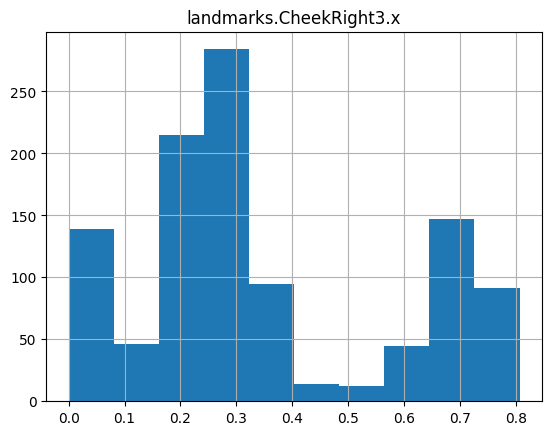

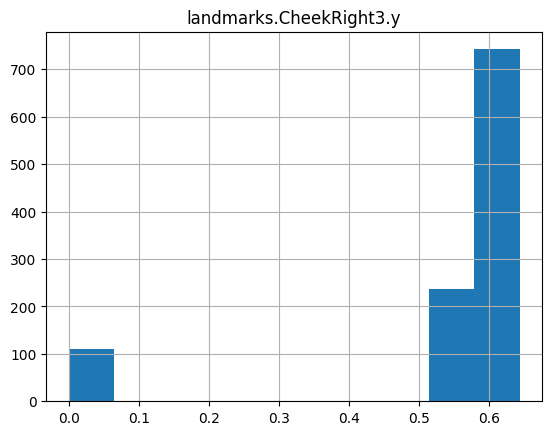

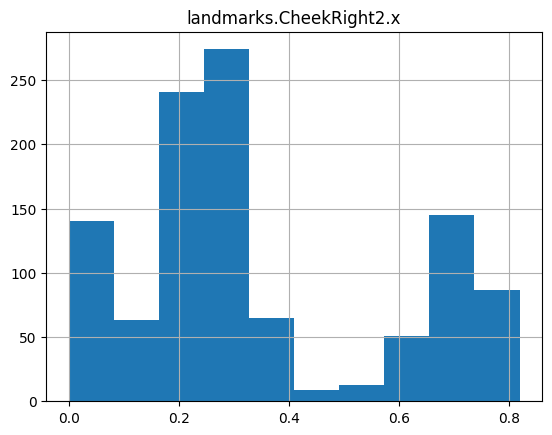

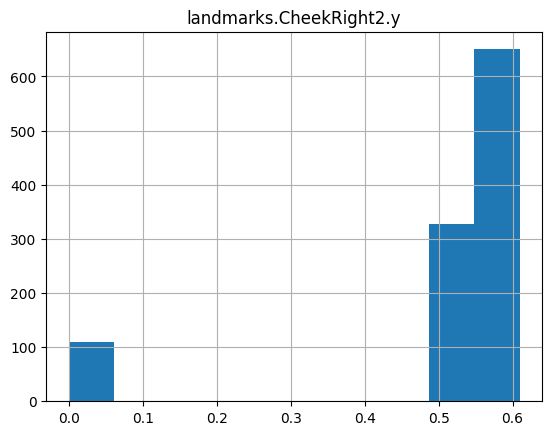

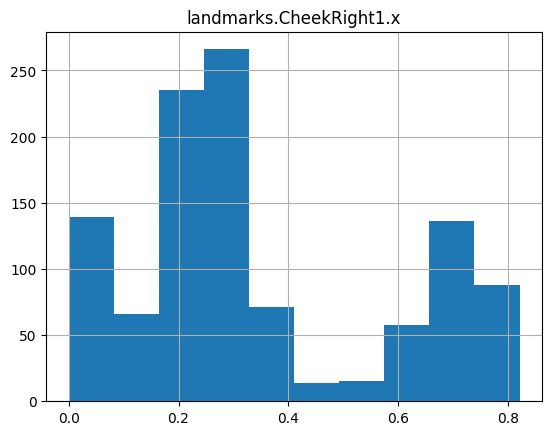

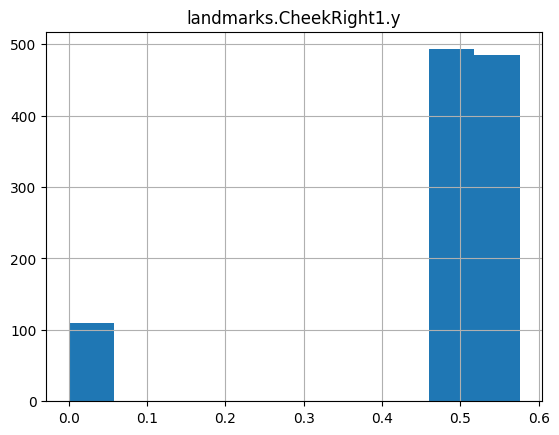

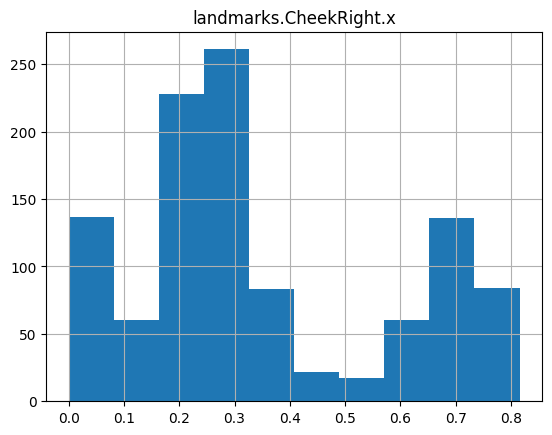

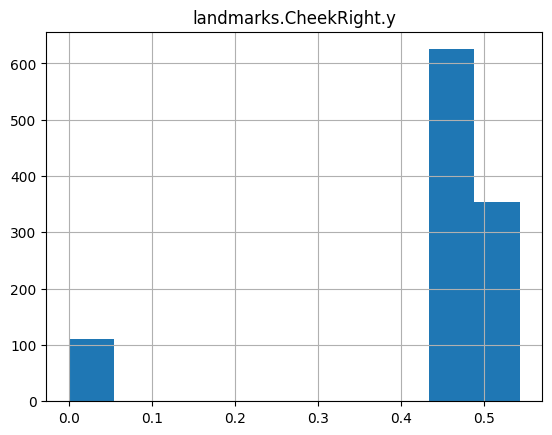

In [88]:
# print('Elements before cleaning: ', len(df))
# for col in df.columns:
#     df = df.drop(df.index[df[col] < 0])
# print('Elements after cleaning: ', len(df))

# # TODO: Actually insted of removing the row we should predict the landmark giving the other correct ones. ldk = avg(prev_ldk, next_ldk)


# Remove negative annotations, put 0. 
df[df < 0] = 0
for col in df.columns:
        plt.title(col)
        df[col].hist(bins=10)
        plt.show()

## Model selection and fitting

In [90]:
df.head()

,landmarks.CheekLeft.x,landmarks.CheekLeft.y,landmarks.CheekLeft1.x,landmarks.CheekLeft1.y,landmarks.CheekLeft2.x,landmarks.CheekLeft2.y,landmarks.CheekLeft3.x,landmarks.CheekLeft3.y,landmarks.CheekLeft4.x,landmarks.CheekLeft4.y,...,landmarks.CheekRight4.x,landmarks.CheekRight4.y,landmarks.CheekRight3.x,landmarks.CheekRight3.y,landmarks.CheekRight2.x,landmarks.CheekRight2.y,landmarks.CheekRight1.x,landmarks.CheekRight1.y,landmarks.CheekRight.x,landmarks.CheekRight.y
0,0.693559,0.478481,0.698559,0.517226,0.690250,0.555536,0.679992,0.593201,0.666287,0.629881,...,0.255428,0.637312,0.234708,0.598765,0.221126,0.558599,0.213314,0.518461,0.213662,0.478176
0,0.391375,0.449653,0.377097,0.488157,0.365489,0.528420,0.368554,0.568067,0.386384,0.606044,...,0.758842,0.615812,0.774506,0.583076,0.787729,0.549968,0.794337,0.515649,0.791965,0.482290
0,0.707173,0.487369,0.712379,0.513759,0.710694,0.538641,0.701952,0.564724,0.688847,0.587951,...,0.347883,0.557656,0.329672,0.531787,0.326239,0.503141,0.337252,0.471831,0.355085,0.440526
0,0.752444,0.458999,0.754562,0.496602,0.748769,0.534786,0.739864,0.572290,0.720435,0.608181,...,0.326542,0.599140,0.314287,0.562113,0.308323,0.524878,0.310469,0.486692,0.318172,0.449158
0,0.301350,0.458407,0.292353,0.496408,0.288713,0.535456,0.293869,0.573659,0.307085,0.611452,...,0.700696,0.616011,0.717587,0.579874,0.724894,0.543023,0.728623,0.505710,0.723958,0.469153


In [91]:
y.head()

0    0.038024
0    0.086072
0    0.104373
0   -0.016005
0    0.005817
Name: angles, dtype: float64

In [84]:
from sklearn.model_selection import train_test_split

X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('Train-set size: ', len(X_train))
print('Test-set size: ', len(X_test))


Train-set size:  761
Test-set size:  327


In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge


classifiers = [
    LinearRegression(),
    Lasso(), 
    Ridge(),
]

parameters = [
    {},
    {'alpha':[0.1, 1, 10]},
    {'alpha':[0.1, 1, 10]},
]

for model, params in zip(classifiers, parameters):
    clf = GridSearchCV(model, params, cv=10)
    clf.fit(X_train, y_train)
    print(type(model).__name__, 'has best params:', clf.best_params_, 'with a score of', clf.best_score_)

LinearRegression has best params: {} with a score of 0.9037117378163785
Lasso has best params: {'alpha': 0.1} with a score of -0.008444525916996893
Ridge has best params: {'alpha': 0.1} with a score of 0.870965011868018


In [86]:
from sklearn.metrics import mean_squared_error
# Chosen model 
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

error = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on testset: {error*180} degrees')


Mean Squared Error on testset: 2.1470522281032447 degress


## Final model for predictions

In [87]:
# Final trained model
model.fit(X, y)


Lasso(alpha=0.1)